In [6]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.utils import load_img, img_to_array

In [7]:
# Directory with training pictures
# Directory with training pictures


train_animal_bite_dir = os.path.join('./train/Acemiz-MR')
train_bleeding_dir = os.path.join('./train/Azee')
train_broken_teeth_dir = os.path.join('./train/Cetril')
train_broken_toe_dir = os.path.join('./train/Comon')
train_bruises_dir = os.path.join('./train/Digene')
train_chemical_burn_dir = os.path.join('./train/Eldoper')
train_choking_dir = os.path.join('./train/Imodium')
train_cuts_dir = os.path.join('./train/Lent-M')
train_drowing_dir = os.path.join('./train/Livz-M')
train_freezing_dir = os.path.join('./train/Mont air')
train_frost_bite_dir = os.path.join('./train/Multivitamin W')
train_heat_rash_dir = os.path.join('./train/Pancy')
train_nose_dir = os.path.join('./train/TusQ-D')
train_seizure_dir = os.path.join('./train/Zofer 4')


validation_animal_bite_dir = os.path.join('./validate/Acemiz-MR')
validation_bleeding_dir = os.path.join('./validate/Azee')
validation_broken_teeth_dir = os.path.join('./validate/Cetril')
validation_broken_toe_dir = os.path.join('./validate/Comon')
validation_bruises_dir = os.path.join('./validate/Digene')
validation_chemical_burn_dir = os.path.join('./validate/Eldoper')
validation_choking_dir = os.path.join('./validate/Imodium')
validation_cuts_dir = os.path.join('./validate/Lent-M')
validation_drowing_dir = os.path.join('./validate/Livz-M')
validation_freezing_dir = os.path.join('./validate/Mont air')
validation_frost_bite_dir = os.path.join('./validate/Multivitamin W')
validation_heat_rash_dir = os.path.join('./validate/Pancy')
validation_nose_dir = os.path.join('./validate/TusQ-D')
validation_seizure_dir = os.path.join('./validate/Zofer 4')

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(14, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


# All images will be rescaled by 1./255 plus the agumentation
train_datagen = ImageDataGenerator(rescale=1/255)


'''
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
'''
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validate/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        class_mode='categorical')


checkpoint_filepath = 'weight.{epoch:02d}-{val_loss:.2f}.keras'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max'

)

Found 300 images belonging to 14 classes.
Found 120 images belonging to 14 classes.


In [71]:
history = model.fit(train_generator,
                  steps_per_epoch=1,  
                  epochs=50,
                  verbose=1,
                  validation_data = validation_generator,
                  validation_steps=10,
                  callbacks=[model_checkpoint_callback], 
                  validation_split=0.1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 0.0461 - val_accuracy: 0.9500 - val_loss: 0.2172
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8000 - loss: 0.2482 - val_accuracy: 0.9000 - val_loss: 0.2445
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.0822 - val_accuracy: 0.9600 - val_loss: 0.2314
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.2242 - val_accuracy: 0.8500 - val_loss: 0.2838
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.1380 - val_accuracy: 0.8700 - val_loss: 0.3561
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0660
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9000 - loss: 0.1349 - val_accuracy: 0.9300 - val_loss: 0.2572
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 0.9500 - val_loss: 0.0895
Epoch 9/50
1/1

In [72]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
'''# serialize weights to HDF5
model.save_weights("model1.h5")'''
print("Saved model to disk")

Saved model to disk


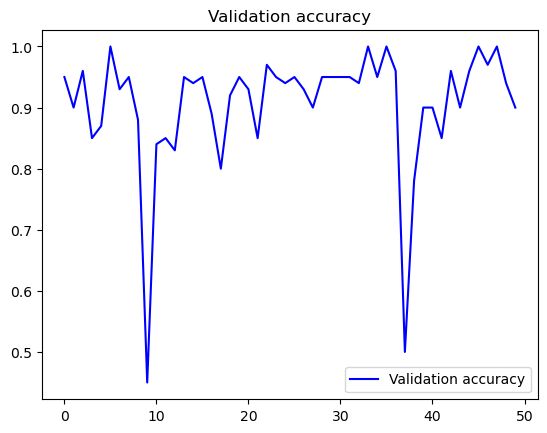

<Figure size 640x480 with 0 Axes>

In [73]:
# PLOTTING RESULTS

import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
'''
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
'''
plt.title('Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

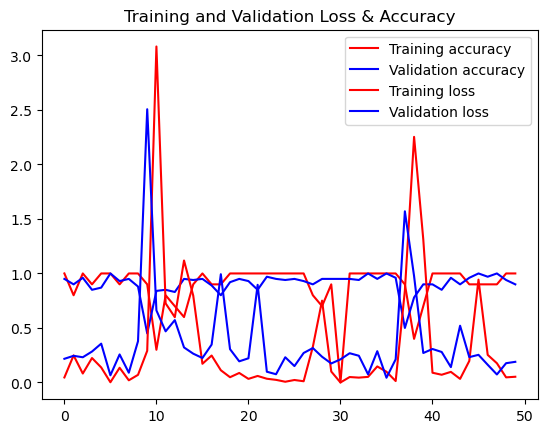

<Figure size 640x480 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
 
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation Loss & Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [84]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
from tkvideo import tkvideo

'''import os
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
'''
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings
from IPython.display import YouTubeVideo
filterwarnings("ignore")

In [76]:
tablet_excel = pd.read_excel('Tablets.xlsx')
tablet_excel.set_index("Tablet", inplace = True)

In [77]:
def tablet_show(root, i):
    
    main = Label(root, text = "The medicine in your hand is called \n " + i ,
                     font=("Ariel",12,'bold'), padx=10).pack(pady=3)
    
    tab_dosage = Label(root, text = "Dosage: ",
                       font=("Ariel",10,'bold'), padx=10,).pack(pady=3, side= TOP, anchor="w")
    
    tab_dosage1 = Label(root, text = tablet_excel._get_value(i,"Dosage"),
                       font=("Ariel",10), padx=10, wraplength = 800, justify = tk.LEFT).pack(pady=3, side= TOP, anchor="w")
    
    tab_taken = Label(root, text = "How to use the tablet: ",
                      font=("Ariel",10,'bold'), padx=10).pack(pady=3, side= TOP, anchor="w")
    
    tab_taken1 = Label(root, text = tablet_excel._get_value(i,"how_to_take"),
                      font=("Ariel",10), padx=10, wraplength = 800, justify = tk.LEFT).pack(pady=3, side= TOP, anchor="w")
    
    '''tab_not_taken = Label(root, text = "When not to use the tablet: ",
                          font=("Ariel",10,'bold'), padx=10).pack(pady=3, side= TOP, anchor="w")
    
    tab_not_taken1 = Label(root, text = tablet_excel._get_value(i,"when_not_to_take"),
                          font=("Ariel",10), padx=10, wraplength = 800, justify = tk.LEFT).pack(pady=3, side= TOP, anchor="w")'''
    
    tab_precaution = Label(root, text = "Precautions to follow to use the tablet: ",
                           font=("Ariel",10,'bold'), padx=10).pack(pady=3, side= TOP, anchor="w")
    
    tab_precaution1 = Label(root, text = tablet_excel._get_value(i,"Precaution"),
                           font=("Ariel",10), padx=10, wraplength = 800, justify = tk.LEFT).pack(pady=3, side= TOP, anchor="w")
    
    tab_storage = Label(root, text = "Storage ",
                        font=("Ariel",10,'bold'), padx=10).pack(pady=3, side= TOP, anchor="w")
    
    tab_storage1 = Label(root, text = tablet_excel._get_value(i,"Storage"),
                        font=("Ariel",10), padx=10, wraplength = 800, justify = tk.LEFT).pack(pady=3, side= TOP, anchor="w")
    
    tab_side_effects = Label(root, text = "Some side effects of the tablet are: ",
                             font=("Ariel",10,'bold'), padx=10).pack(pady=3, side= TOP, anchor="w")
    
    tab_side_effects1 = Label(root, text = tablet_excel._get_value(i,"Side Effects"),
                             font=("Ariel",10), padx=10, wraplength = 800, justify = tk.LEFT).pack(pady=3, side= TOP, anchor="w")
    
        
# ------------------------------------------ MEDICINE ASSISTANT -------------------------------------------------------------- #

def medicine_assistant():
    
    
    my_w = tk.Tk()
    my_w.geometry("600x750")
    my_w.title('Medicine Assistant')
    
    '''my_label_root = Label(my_w, 
                 text = "Welcome to FIRST AID ASSISTANCE \n Please follow the instructions as mentioned",
                 font=("Verdana",12,'bold'), padx=10, pady=10).pack()'''
    
    my_label_root = Label(my_w, 
                 text = "Welcome to MEDICAL ASSISTANCE \n Please follow the instructions as mentioned",
                 font=("Verdana",12,'bold'), padx=10, pady=10).pack()
    
    global tab
    tab = StringVar(my_w)
    
    b1 = tk.Button(my_w, text='Upload Image', width=20,command = lambda:upload_file()).pack(pady = 5)
    
    tablet = ["DIGENE","COMON","ELDOPER","ZOFER","CETRIL-M","AZEE","MONTAIR","TusQ-D","PANCY",
                "ACEMIZ-MR","IMODIUM","LENT-M","LIVZ-M","MULTIVITAMIN-W"]
    
    tablets = []
    
    predicted_classes = []
    links = ""
    
    def upload_file():
        f_types = [('Jpg Files', '*.jpg'),('PNG Files','*.png')]   # type of files to select 
        filename = tk.filedialog.askopenfilename(multiple=True,filetypes=f_types)
    
        for f in filename:
            img=Image.open(f) # read the image file
            img=img.resize((150,150)) # new width & height
            img=ImageTk.PhotoImage(img)
            e1 =tk.Label(my_w)
        
        
            e1.image = img # keep a reference! by attaching it to a widget attribute
            e1['image']=img # Show Image 
            e1.pack()
            
            img = load_img(f, target_size=(300, 300))
            x = img_to_array(img)
            x = np.expand_dims(img, axis=0)

            images = np.vstack([x])
            classes = model.predict(images, batch_size=10)


        for i in classes[0]:
            predicted_classes.append(round(i))
        
        print(predicted_classes)
        for j in range (14):
            if predicted_classes[j] == 1:
                links = tablet[j]
                break
            
        '''description = first_aid_excel._get_value(links,"Description")
        l1 = tk.Label(my_w, text=description, font=("Ariel",12,'bold'), wraplength = 500, pady = 6).pack()
        
        my_button = Button(base, text="Show Video", pady = 5, command = firstaid_video(links))
        my_button.pack()
        
        l = Label(my_w)
        l.pack()

        player = tkvideo("First Aid Videos/{}.mp4".format(links), l, loop = 1, size = (410,300))

        player.play()
    
        l1 = tk.Label(my_w, text = "Do the procedure as told in the video and you will definetly get well soon", 
                      font = ("Ariel",10,'bold'), pady = 5).pack()
        
        final1 = tk.Label(my_w, text = "Thank you for using our services \n Wish you a speedy recovery", 
                          font = ('calibre',10,'bold'), pady = 5).pack()'''
        
        l = Label(my_w)
        l.pack()
        
        tablet_show(my_w, links)
    
        l1 = tk.Label(my_w, text = "Follow the instructions as said and you will definetly get well soon", 
                      font = ("Ariel",10,'bold'), pady = 5).pack()
        
        final1 = tk.Label(my_w, text = "Thank you for using our services \n Wish you a speedy recovery", 
                          font = ('calibre',10,'bold'), pady = 5).pack()
        
        
        
        #time.sleep(5)
        #bvPlayer("First Aid Videos/{}.mp4".format(links), draggable = True, fps = 28, dim = (854, 480), videoOptions = True)
        
        
    my_w.mainloop() 

In [83]:
medicine_assistant()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
